In [2]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yash0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Importing dataset from local

In [4]:
df_train = pd.read_csv("steam_reviews_dataset.csv")
print(df_train.dtypes)
print(df_train.shape)
df_train

review_id            int64
title               object
year               float64
user_review         object
user_suggestion      int64
dtype: object
(17494, 5)


,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1


Below, I have checked number of 0's and 1's in the dataset to find the skewness

In [5]:
df_train[df_train['user_suggestion'] == 0]

,review_id,title,year,user_review,user_suggestion
8,9,Spooky's Jump Scare Mansion,2015.0,"Somewhere between light hearted, happy parody ...",0
91,92,Spooky's Jump Scare Mansion,2015.0,Has a few nice elements but overall quite bori...,0
93,94,Spooky's Jump Scare Mansion,2015.0,boring. jump scares have 0 effect on me. if yo...,0
99,100,Spooky's Jump Scare Mansion,2015.0,What the hell is this rubbish? There's nothing...,0
100,101,Spooky's Jump Scare Mansion,2015.0,"It's not a bad game, it's just waaaay too slow...",0
...,...,...,...,...,...
17421,25467,School of Dragons,2018.0,Product received for freeI think we can all ag...,0
17422,25468,School of Dragons,2018.0,Im really dissapointed of the Game on steam! i...,0
17423,25469,School of Dragons,2018.0,The only fun thing about this game is the flyi...,0
17425,25471,EverQuest II,2014.0,"its okay, but not great, thats just it. It has...",0


In [6]:
df_train[df_train['user_suggestion'] == 1]

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1
...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,Arguably the single greatest mmorp that exists...,1
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own cha...",1
17491,25537,EverQuest II,2011.0,When I frist started playing Everquest 2 it wa...,1
17492,25538,EverQuest II,NaN,cool game. THe only thing that REALLY PISSES M...,1


Text(0, 0.5, 'No. of values')

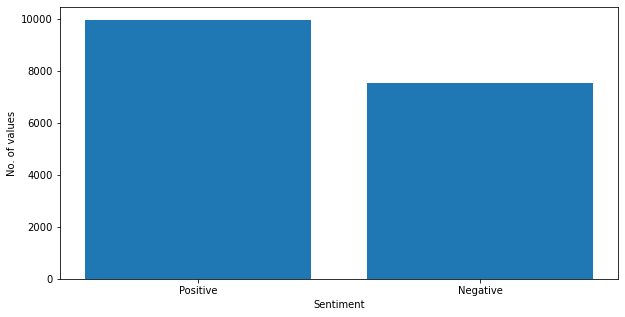

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
x = [df_train[df_train['user_suggestion'] == 1]['user_suggestion'].count(), df_train[df_train['user_suggestion'] == 0]['user_suggestion'].count()]
y=['Positive', 'Negative']
plt.bar(y,x)
plt.xlabel('Sentiment')
plt.ylabel('No. of values')

Below is an analysis of the user_review column

In [8]:
df_train['text length'] = df_train['user_review'].apply(len)
df_train.head(20)

,review_id,title,year,user_review,user_suggestion,text length
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,710
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,335
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,397
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,280
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,334
5,6,Spooky's Jump Scare Mansion,2015.0,"Early Access ReviewIt's pretty cute at first, ...",1,209
6,7,Spooky's Jump Scare Mansion,2017.0,Great game. it's a cute little horror game tha...,1,198
7,8,Spooky's Jump Scare Mansion,2015.0,Spooky's Jump Scare Mansion is a Free Retro ma...,1,917
8,9,Spooky's Jump Scare Mansion,2015.0,"Somewhere between light hearted, happy parody ...",0,5217
9,10,Spooky's Jump Scare Mansion,2015.0,This game with its cute little out of the wall...,1,304


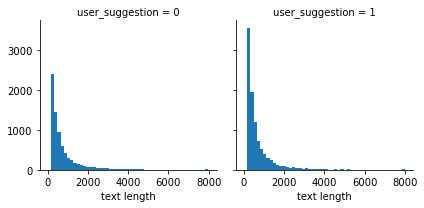

In [9]:
import seaborn as sns
g = sns.FacetGrid(data=df_train, col='user_suggestion')
g.map(plt.hist, 'text length', bins=50)

<AxesSubplot:xlabel='user_suggestion', ylabel='text length'>

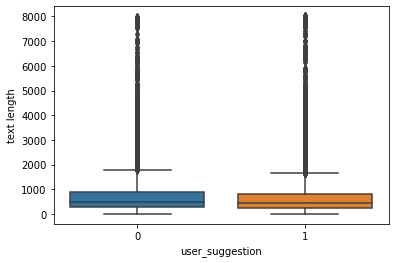

In [10]:
sns.boxplot(x='user_suggestion', y='text length', data=df_train)

# Text pre-processing steps

1. Tokenization

In [11]:
def tokenize(column):
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

In [15]:
df_train['tokenized'] = df_train.apply(lambda x: tokenize(x['user_review'].lower()), axis=1)
df_train.head()

,review_id,title,year,user_review,user_suggestion,text length,tokenized
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,710,"[i, scared, and, hearing, creepy, voices, so, ..."
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,335,"[best, game, more, better, than, sam, pepper, ..."
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,397,"[a, littly, iffy, on, the, controls, but, once..."
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,280,"[great, game, fun, and, colorful, and, all, si..."
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,334,"[not, many, games, have, the, cute, tag, right..."


2. Stopword removal

In [16]:
def remove_stopwords(tokenized_column):
    stops = set(stopwords.words("english"))
    return [word for word in tokenized_column if not word in stops]

In [17]:
df_train['stopwords_removed'] = df_train.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)

In [18]:
df_train.head()[['user_review', 'tokenized', 'stopwords_removed']]

,user_review,tokenized,stopwords_removed
0,I'm scared and hearing creepy voices. So I'll...,"[i, scared, and, hearing, creepy, voices, so, ...","[scared, hearing, creepy, voices, pause, momen..."
1,"Best game, more better than Sam Pepper's YouTu...","[best, game, more, better, than, sam, pepper, ...","[best, game, better, sam, pepper, youtube, acc..."
2,"A littly iffy on the controls, but once you kn...","[a, littly, iffy, on, the, controls, but, once...","[littly, iffy, controls, know, play, easy, mas..."
3,"Great game, fun and colorful and all that.A si...","[great, game, fun, and, colorful, and, all, si...","[great, game, fun, colorful, side, note, thoug..."
4,Not many games have the cute tag right next to...,"[not, many, games, have, the, cute, tag, right...","[many, games, cute, tag, right, next, horror, ..."


3. Stemming

In [121]:
from nltk.stem.porter import *
def apply_stemming(stopwords_removed):
    stemmer = PorterStemmer() 
    return [stemmer.stem(word) for word in stopwords_removed]

In [122]:
df_train['stemmed'] = df_train.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
df_train.head()

,review_id,title,year,user_review,user_suggestion,text length,tokenized,stopwords_removed,stemmed,processed_words
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,710,"[i, scared, and, hearing, creepy, voices, so, ...","[scared, hearing, creepy, voices, pause, momen...","[scare, hear, creepi, voic, paus, moment, writ...","scare,hear,creepi,voic,paus,moment,write,revie..."
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,335,"[best, game, more, better, than, sam, pepper, ...","[best, game, better, sam, pepper, youtube, acc...","[best, game, better, sam, pepper, youtub, acco...","best,game,better,sam,pepper,youtub,account,nee..."
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,397,"[a, littly, iffy, on, the, controls, but, once...","[littly, iffy, controls, know, play, easy, mas...","[littli, iffi, control, know, play, easi, mast...","littli,iffi,control,know,play,easi,master,made..."
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,280,"[great, game, fun, and, colorful, and, all, si...","[great, game, fun, colorful, side, note, thoug...","[great, game, fun, color, side, note, though, ...","great,game,fun,color,side,note,though,get,wind..."
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,334,"[not, many, games, have, the, cute, tag, right...","[many, games, cute, tag, right, next, horror, ...","[mani, game, cute, tag, right, next, horror, t...","mani,game,cute,tag,right,next,horror,tag,first..."


In [124]:
df_train[['user_review', 'stemmed']].head()

,user_review,stemmed
0,I'm scared and hearing creepy voices. So I'll...,"[scare, hear, creepi, voic, paus, moment, writ..."
1,"Best game, more better than Sam Pepper's YouTu...","[best, game, better, sam, pepper, youtub, acco..."
2,"A littly iffy on the controls, but once you kn...","[littli, iffi, control, know, play, easi, mast..."
3,"Great game, fun and colorful and all that.A si...","[great, game, fun, color, side, note, though, ..."
4,Not many games have the cute tag right next to...,"[mani, game, cute, tag, right, next, horror, t..."


# Implementation of algorithms

In [21]:
import string
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
df_train['processed_words'] = [','.join(map(str, l)) for l in df_train['stemmed']]

In [23]:
df_train.head()['processed_words']

0    scare,hear,creepi,voic,paus,moment,write,revie...
1    best,game,better,sam,pepper,youtub,account,nee...
2    littli,iffi,control,know,play,easi,master,made...
3    great,game,fun,color,side,note,though,get,wind...
4    mani,game,cute,tag,right,next,horror,tag,first...
Name: processed_words, dtype: object

In [26]:
df_train.head()

,review_id,title,year,user_review,user_suggestion,text length,tokenized,stopwords_removed,stemmed,processed_string,cleaned
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll...,1,710,"[i, scared, and, hearing, creepy, voices, so, ...","[scared, hearing, creepy, voices, pause, momen...","[scare, hear, creepi, voic, paus, moment, writ...","scare,hear,creepi,voic,paus,moment,write,revie...",scare hear creepi voic paus moment write revie...
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTu...",1,335,"[best, game, more, better, than, sam, pepper, ...","[best, game, better, sam, pepper, youtube, acc...","[best, game, better, sam, pepper, youtub, acco...","best,game,better,sam,pepper,youtub,account,nee...",best game better sam pepper youtub account nee...
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you kn...",1,397,"[a, littly, iffy, on, the, controls, but, once...","[littly, iffy, controls, know, play, easy, mas...","[littli, iffi, control, know, play, easi, mast...","littli,iffi,control,know,play,easi,master,made...",littli iffi control know play easi master made...
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A si...",1,280,"[great, game, fun, and, colorful, and, all, si...","[great, game, fun, colorful, side, note, thoug...","[great, game, fun, color, side, note, though, ...","great,game,fun,color,side,note,though,get,wind...",great game fun color side note though get wind...
4,5,Spooky's Jump Scare Mansion,2015.0,Not many games have the cute tag right next to...,1,334,"[not, many, games, have, the, cute, tag, right...","[many, games, cute, tag, right, next, horror, ...","[mani, game, cute, tag, right, next, horror, t...","mani,game,cute,tag,right,next,horror,tag,first...",mani game cute tag right next horror tag first...


In [24]:
df = df_train[['user_review','processed_words','user_suggestion']]
df.head()

,user_review,processed_words,user_suggestion
0,I'm scared and hearing creepy voices. So I'll...,"scare,hear,creepi,voic,paus,moment,write,revie...",1
1,"Best game, more better than Sam Pepper's YouTu...","best,game,better,sam,pepper,youtub,account,nee...",1
2,"A littly iffy on the controls, but once you kn...","littli,iffi,control,know,play,easi,master,made...",1
3,"Great game, fun and colorful and all that.A si...","great,game,fun,color,side,note,though,get,wind...",1
4,Not many games have the cute tag right next to...,"mani,game,cute,tag,right,next,horror,tag,first...",1


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 

Target variable (y) = 'user_suggestion' column

In [26]:
X = df['processed_words']
y = df['user_suggestion']

Dataset split into 80:20 ratio

In [27]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature extractor = countvectorizer

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

vectorizer = CountVectorizer(ngram_range = [1,1]) #please change here for bigram

train_cv = vectorizer.fit_transform(X_Train.apply(lambda x: np.str_(x)))
print(train_cv.shape,"\n")
print(train_cv)

test_cv = vectorizer.transform(X_Test.apply(lambda x: np.str_(x)))
print(test_cv.shape,"\n")
print(test_cv)

(13995, 30579) 

  (0, 9678)	1
  (0, 25674)	1
  (0, 27820)	1
  (0, 10250)	3
  (0, 2701)	1
  (0, 2983)	1
  (0, 21715)	1
  (0, 26356)	1
  (0, 17520)	2
  (0, 16451)	1
  (0, 24028)	1
  (0, 25999)	1
  (0, 23681)	1
  (0, 4175)	1
  (0, 19748)	1
  (0, 26097)	1
  (0, 27881)	1
  (1, 7293)	1
  (1, 153)	1
  (1, 21337)	1
  (1, 9863)	4
  (1, 24494)	2
  (1, 1922)	1
  (1, 17911)	2
  (1, 11275)	1
  :	:
  (13994, 11640)	1
  (13994, 22918)	1
  (13994, 16563)	1
  (13994, 23445)	1
  (13994, 17225)	2
  (13994, 10476)	1
  (13994, 27130)	1
  (13994, 10784)	1
  (13994, 10379)	1
  (13994, 1888)	1
  (13994, 20191)	1
  (13994, 5756)	1
  (13994, 24835)	1
  (13994, 8919)	1
  (13994, 10887)	1
  (13994, 11851)	1
  (13994, 22627)	1
  (13994, 7550)	1
  (13994, 8537)	1
  (13994, 24075)	1
  (13994, 21869)	2
  (13994, 23849)	1
  (13994, 26320)	1
  (13994, 8415)	1
  (13994, 2607)	1
(3499, 30579) 

  (0, 153)	1
  (0, 5145)	2
  (0, 7293)	1
  (0, 9678)	2
  (0, 9863)	2
  (0, 10476)	1
  (0, 15635)	1
  (0, 18539)	2
  (0, 20839)	

In [29]:
print(vectorizer.vocabulary_,"\n")

{'fun': 9678, 'time': 25674, 'waster': 27820, 'get': 10250, 'bit': 2701, 'bore': 2983, 'room': 21715, 'type': 26356, 'outfit': 17520, 'need': 16451, 'start': 24028, 'train': 25999, 'special': 23681, 'churn': 4175, 'quest': 19748, 'tri': 26097, 'weapon': 27881, 'earli': 7293, 'access': 153, 'reviewthi': 21337, 'game': 9863, 'suck': 24494, 'awsometh': 1922, 'part': 17911, 'hard': 11275, 'earn': 7300, 'exp': 8331, 'must': 16233, 'kill': 13595, 'player': 18563, 'gon': 10539, 'na': 16293, 'awsom': 1921, 'freeand': 9417, 'spend': 23739, 'half': 11158, 'hour': 11928, 'find': 8936, 'singl': 22963, 'match': 15037, 'current': 5528, 'would': 28447, 'reccomend': 20142, 'atm': 1668, 'stronger': 24328, 'zombi': 28917, 'take': 24929, 'bullet': 3329, 'mean': 15146, 'instant': 12758, 'happen': 11247, 'alot': 816, 'even': 8103, 'begin': 2440, 'random': 19929, 'crit': 5348, 'fair': 8567, 'balanc': 2084, 'guy': 11061, 'funni': 9722, 'joke': 13306, 'poor': 18813, 'often': 17123, 'terribl': 25247, 'unbalanc

Naive Bayes Model with top 5000 features

In [32]:
from sklearn.feature_selection import SelectKBest, chi2, SelectFromModel, f_regression

selector = SelectKBest(score_func = chi2, k = 5000)
train_k = selector.fit_transform(train_cv, y_Train)
print ("Train feature space before selecting 5000 best features: ", train_cv.shape)
print ("Train feature space after selecting 5000 best features: ", train_k.shape)

Train feature space before selecting 5000 best features:  (13995, 30579)
Train feature space after selecting 5000 best features:  (13995, 5000)


In [33]:
test_k = selector.transform(test_cv)
print ("Test feature space before selecting 5000 best features: ", test_cv.shape)
print ("Test feature space after selecting 5000 best features: ", test_k.shape)

Test feature space before selecting 5000 best features:  (3499, 30579)
Test feature space after selecting 5000 best features:  (3499, 5000)


In [34]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(train_k, y_Train)

MultinomialNB()

In [35]:
y_predicted = naive_bayes_classifier.predict(test_k)
y_predicted

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [36]:
from sklearn import metrics

In [44]:
score_naive_test = metrics.accuracy_score(y_Test, y_predicted)
print("Accuracy:  " +str(score_naive_test*100))
print(metrics.classification_report(y_Test, y_predicted, target_names = ['0', '1']))

Accuracy:  83.88110888825379
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1506
           1       0.86      0.86      0.86      1993

    accuracy                           0.84      3499
   macro avg       0.84      0.84      0.84      3499
weighted avg       0.84      0.84      0.84      3499



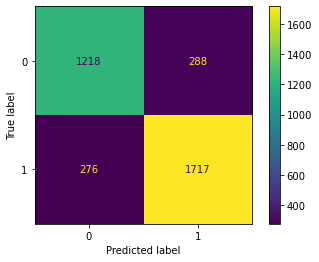

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_Test, y_predicted)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd.plot()

Further experimentation Naive Bayes 

Instead of chi2, I tried using f_regression method which gave slightly better accuracy

In [41]:
selector_x = SelectKBest(score_func = f_regression, k = 5000)
train_k_x = selector_x.fit_transform(train_cv, y_Train)
print ("Train feature space before selecting 500 best features: ", train_cv.shape)
print ("Train feature space after selecting 500 best features: ", train_k_x.shape)

Train feature space before selecting 500 best features:  (13995, 30579)
Train feature space after selecting 500 best features:  (13995, 5000)


In [42]:
test_k_x = selector_x.transform(test_cv)
print ("Test feature space before selecting 500 best features: ", test_cv.shape)
print ("Test feature space after selecting 500 best features: ", test_k_x.shape)

Test feature space before selecting 500 best features:  (3499, 30579)
Test feature space after selecting 500 best features:  (3499, 5000)


In [43]:
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(train_k_x, y_Train)
y_predicted_x = naive_bayes_classifier.predict(test_k_x)
y_predicted_x

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [44]:
score_naive_x = metrics.accuracy_score(y_Test, y_predicted_x)
print("Accuracy:  " +str(score_naive_x*100))
print(metrics.classification_report(y_Test, y_predicted_x, target_names = ['0', '1']))

Accuracy:  84.22406401829095
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1506
           1       0.85      0.87      0.86      1993

    accuracy                           0.84      3499
   macro avg       0.84      0.84      0.84      3499
weighted avg       0.84      0.84      0.84      3499



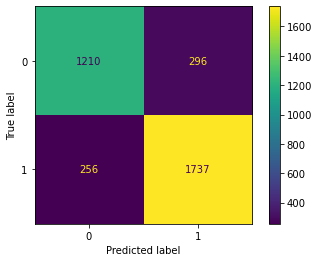

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_Test, y_predicted_x)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0', '1'])
cmd.plot()

In [46]:
y_predicted_x

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

# Error Analysis for Experiment 1

In [48]:
predictions = y_predicted_x
labels = df["user_suggestion"]
inputs = df["processed_words"]

for idx, prediction, label in zip(enumerate(inputs), predictions, labels):
    if prediction != label:
        print(idx[0], ' has been classified as', prediction, 'and should be', label) 
        print ("*"*20)
        print ("\n")

3  has been classified as 0 and should be 1
********************


4  has been classified as 0 and should be 1
********************


6  has been classified as 0 and should be 1
********************


8  has been classified as 1 and should be 0
********************


12  has been classified as 0 and should be 1
********************


15  has been classified as 0 and should be 1
********************


18  has been classified as 0 and should be 1
********************


27  has been classified as 0 and should be 1
********************


28  has been classified as 0 and should be 1
********************


29  has been classified as 0 and should be 1
********************


30  has been classified as 0 and should be 1
********************


33  has been classified as 0 and should be 1
********************


35  has been classified as 0 and should be 1
********************


36  has been classified as 0 and should be 1
********************


38  has been classified as 0 and should be 1
*******

********************


549  has been classified as 1 and should be 0
********************


551  has been classified as 0 and should be 1
********************


554  has been classified as 0 and should be 1
********************


555  has been classified as 0 and should be 1
********************


556  has been classified as 0 and should be 1
********************


558  has been classified as 0 and should be 1
********************


559  has been classified as 0 and should be 1
********************


561  has been classified as 0 and should be 1
********************


562  has been classified as 0 and should be 1
********************


564  has been classified as 0 and should be 1
********************


566  has been classified as 0 and should be 1
********************


567  has been classified as 0 and should be 1
********************


574  has been classified as 0 and should be 1
********************


575  has been classified as 0 and should be 1
********************


576  has be



1305  has been classified as 0 and should be 1
********************


1308  has been classified as 0 and should be 1
********************


1309  has been classified as 0 and should be 1
********************


1312  has been classified as 0 and should be 1
********************


1313  has been classified as 0 and should be 1
********************


1317  has been classified as 0 and should be 1
********************


1318  has been classified as 0 and should be 1
********************


1319  has been classified as 0 and should be 1
********************


1325  has been classified as 0 and should be 1
********************


1326  has been classified as 0 and should be 1
********************


1327  has been classified as 0 and should be 1
********************


1328  has been classified as 0 and should be 1
********************


1330  has been classified as 0 and should be 1
********************


1333  has been classified as 0 and should be 1
********************


1335  has been cla

********************


1849  has been classified as 0 and should be 1
********************


1853  has been classified as 1 and should be 0
********************


1855  has been classified as 1 and should be 0
********************


1856  has been classified as 0 and should be 1
********************


1857  has been classified as 0 and should be 1
********************


1862  has been classified as 1 and should be 0
********************


1863  has been classified as 0 and should be 1
********************


1866  has been classified as 1 and should be 0
********************


1871  has been classified as 1 and should be 0
********************


1873  has been classified as 1 and should be 0
********************


1875  has been classified as 0 and should be 1
********************


1876  has been classified as 0 and should be 1
********************


1878  has been classified as 1 and should be 0
********************


1879  has been classified as 1 and should be 0
********************

2370  has been classified as 0 and should be 1
********************


2371  has been classified as 0 and should be 1
********************


2372  has been classified as 0 and should be 1
********************


2378  has been classified as 0 and should be 1
********************


2380  has been classified as 0 and should be 1
********************


2381  has been classified as 0 and should be 1
********************


2384  has been classified as 0 and should be 1
********************


2387  has been classified as 0 and should be 1
********************


2394  has been classified as 0 and should be 1
********************


2396  has been classified as 0 and should be 1
********************


2398  has been classified as 0 and should be 1
********************


2402  has been classified as 0 and should be 1
********************


2406  has been classified as 0 and should be 1
********************


2410  has been classified as 0 and should be 1
********************


2411  has been class

2976  has been classified as 1 and should be 0
********************


2977  has been classified as 1 and should be 0
********************


2979  has been classified as 1 and should be 0
********************


2980  has been classified as 1 and should be 0
********************


2983  has been classified as 0 and should be 1
********************


2985  has been classified as 1 and should be 0
********************


2986  has been classified as 1 and should be 0
********************


2987  has been classified as 1 and should be 0
********************


2988  has been classified as 1 and should be 0
********************


2989  has been classified as 1 and should be 0
********************


2990  has been classified as 1 and should be 0
********************


2992  has been classified as 1 and should be 0
********************


2993  has been classified as 0 and should be 1
********************


2994  has been classified as 1 and should be 0
********************


2997  has been class

In [49]:
false_negative_indices = [1,3,4,6,12,15,18,27,29,33]

In [50]:
for index in false_negative_indices:
    print(str(index) + ": " + df.loc[index]['user_review'])
    print('*'*20)
    print('\n')

1: Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet.
********************


3: Great game, fun and colorful and all that.A side note, though: When are we getting windowed mode? My computer hates fullscreen so.... yeah. The computer doesn't like to run this. Shame, because this is really enjoyable. But until then, I guess I'll settle for more Skyrim. Cheers!
********************


4: Not many games have the cute tag right next to the horror tag on Steam.I first played this game in late 2014 and coming back to it for the first time since. This game is so good for it being free, take advantage and experience it. Try and get to  room 1000 or as close as you can. The further you progress the darker the game be

In [51]:
false_positive_indices = [130, 99, 100, 101, 102, 103, 116, 118, 121, 122, 8]

In [52]:
for index in false_positive_indices:
    print(str(index) + ": " + df.loc[index]['user_review'])
    print('*'*20)
    print('\n')

130: Tedious doesn't even begin to describe this "game". Endless boring corridors leading to yet more boring corridors, practically empty rooms, and forks with no discernible reason for choosing one door over another.Not my idea of entertainment, not even for killing time while something worthwhile installs.
********************


99: What the hell is this rubbish? There's nothing to do other than go from one door to another. Someone actually bothered to make 1000 rooms with absolutely nothing to do? Why are there any positive reviews? Am I missing something? I went through about 20 rooms before I gave up. 0/10
********************


100: It's not a bad game, it's just waaaay too slow for me. You practically do NOTHING for the first 500 rooms and then the "scary" moments aren't scary enough to be worth the boredom of the first 500 rooms :/
********************


101: Well, after room 300 I guess I've had enough of this game. The life-size wooden puppet thing does not adhere to its own 

# Experiment 2

Feature extractor - tfidf

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='word')
train_cv_tfidf = tfidf.fit_transform(X_Train.apply(lambda x: np.str_(x)))
print(train_cv_tfidf.shape,"\n")

(13995, 30579) 



In [74]:
test_cv_tfidf = tfidf.transform(X_Test.apply(lambda x: np.str_(x)))
print(test_cv_tfidf.shape,"\n")

(3499, 30579) 



In [75]:
idf = tfidf.idf_
print(dict(zip(tfidf.get_feature_names(), idf)))

{'aa': 7.179231023501105, 'aaa': 7.020166328871417, 'aaaa': 9.853379672927634, 'aaaaaa': 9.853379672927634, 'aaaaaaaaa': 9.853379672927634, 'aaaaaaaaaaaaaaaaaaaaa': 9.853379672927634, 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa

In [76]:
print(tfidf.vocabulary_,"\n")

{'fun': 9678, 'time': 25674, 'waster': 27820, 'get': 10250, 'bit': 2701, 'bore': 2983, 'room': 21715, 'type': 26356, 'outfit': 17520, 'need': 16451, 'start': 24028, 'train': 25999, 'special': 23681, 'churn': 4175, 'quest': 19748, 'tri': 26097, 'weapon': 27881, 'earli': 7293, 'access': 153, 'reviewthi': 21337, 'game': 9863, 'suck': 24494, 'awsometh': 1922, 'part': 17911, 'hard': 11275, 'earn': 7300, 'exp': 8331, 'must': 16233, 'kill': 13595, 'player': 18563, 'gon': 10539, 'na': 16293, 'awsom': 1921, 'freeand': 9417, 'spend': 23739, 'half': 11158, 'hour': 11928, 'find': 8936, 'singl': 22963, 'match': 15037, 'current': 5528, 'would': 28447, 'reccomend': 20142, 'atm': 1668, 'stronger': 24328, 'zombi': 28917, 'take': 24929, 'bullet': 3329, 'mean': 15146, 'instant': 12758, 'happen': 11247, 'alot': 816, 'even': 8103, 'begin': 2440, 'random': 19929, 'crit': 5348, 'fair': 8567, 'balanc': 2084, 'guy': 11061, 'funni': 9722, 'joke': 13306, 'poor': 18813, 'often': 17123, 'terribl': 25247, 'unbalanc

In [77]:
from sklearn.feature_selection import SelectKBest, chi2
selector_tfidf = SelectKBest(score_func = chi2, k = 5000)
train_k_tfidf = selector_tfidf.fit_transform(train_cv_tfidf, y_Train)
print ("Train feature space before selecting 5000 best features: ", train_cv_tfidf.shape)
print ("Train feature space after selecting 5000 best features: ", train_k_tfidf.shape)

Train feature space before selecting 5000 best features:  (13995, 30579)
Train feature space after selecting 5000 best features:  (13995, 5000)


In [78]:
test_k_tfidf = selector_tfidf.transform(test_cv_tfidf)
print ("Test feature space before selecting 5000 best features: ", test_cv_tfidf.shape)
print ("Test feature space after selecting 5000 best features: ", test_k_tfidf.shape)

Test feature space before selecting 5000 best features:  (3499, 30579)
Test feature space after selecting 5000 best features:  (3499, 5000)


tfidf accuracy with chi2 for train dataset

In [79]:
naive_bayes_classifier_tfidf = MultinomialNB()
naive_bayes_classifier_tfidf.fit(train_k_tfidf, y_Train)

MultinomialNB()

In [125]:
y_test_tfidf = naive_bayes_classifier_tfidf.predict(test_k_tfidf)
y_test_tfidf

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

tfidf accuracy with chi2 for test dataset

In [88]:
from sklearn import metrics
score_naive_test_tfidf = metrics.accuracy_score(y_Test, y_test_tfidf)
print("Accuracy:  " +str(score_naive_test_tfidf*100))
print(metrics.classification_report(y_Test, y_test_tfidf, target_names = ['0', '1']))

Accuracy:  82.70934552729351
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      1506
           1       0.80      0.94      0.86      1993

    accuracy                           0.83      3499
   macro avg       0.84      0.81      0.82      3499
weighted avg       0.84      0.83      0.82      3499



Confusion matrix for Naive Bayes model with tfidf feature extractor

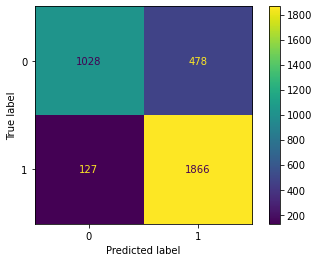

In [90]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_tfidf = confusion_matrix(y_Test, y_test_tfidf)
cmd_tfidf = ConfusionMatrixDisplay(cm_tfidf, display_labels=['0', '1'])
cmd_tfidf.plot()

In [127]:
predictions = y_test_tfidf
labels = df["user_suggestion"]
inputs = df["processed_words"]

for idx, prediction, label in zip(enumerate(inputs), predictions, labels):
    if prediction != label:
        print(idx[0], ' has been classified as', prediction, 'and should be', label) 
        print ("*"*20)
        print ("\n")

3  has been classified as 0 and should be 1
********************


4  has been classified as 0 and should be 1
********************


6  has been classified as 0 and should be 1
********************


8  has been classified as 1 and should be 0
********************


12  has been classified as 0 and should be 1
********************


15  has been classified as 0 and should be 1
********************


27  has been classified as 0 and should be 1
********************


28  has been classified as 0 and should be 1
********************


29  has been classified as 0 and should be 1
********************


33  has been classified as 0 and should be 1
********************


35  has been classified as 0 and should be 1
********************


38  has been classified as 0 and should be 1
********************


39  has been classified as 0 and should be 1
********************


40  has been classified as 0 and should be 1
********************


42  has been classified as 0 and should be 1
*******

********************


635  has been classified as 0 and should be 1
********************


638  has been classified as 0 and should be 1
********************


641  has been classified as 1 and should be 0
********************


642  has been classified as 1 and should be 0
********************


644  has been classified as 0 and should be 1
********************


645  has been classified as 1 and should be 0
********************


647  has been classified as 0 and should be 1
********************


649  has been classified as 0 and should be 1
********************


653  has been classified as 0 and should be 1
********************


654  has been classified as 1 and should be 0
********************


661  has been classified as 1 and should be 0
********************


662  has been classified as 1 and should be 0
********************


664  has been classified as 1 and should be 0
********************


666  has been classified as 1 and should be 0
********************


667  has be

1566  has been classified as 0 and should be 1
********************


1569  has been classified as 0 and should be 1
********************


1571  has been classified as 0 and should be 1
********************


1574  has been classified as 0 and should be 1
********************


1577  has been classified as 1 and should be 0
********************


1578  has been classified as 0 and should be 1
********************


1580  has been classified as 1 and should be 0
********************


1581  has been classified as 0 and should be 1
********************


1583  has been classified as 1 and should be 0
********************


1592  has been classified as 1 and should be 0
********************


1594  has been classified as 0 and should be 1
********************


1596  has been classified as 0 and should be 1
********************


1597  has been classified as 1 and should be 0
********************


1600  has been classified as 0 and should be 1
********************


1601  has been class

2484  has been classified as 1 and should be 0
********************


2485  has been classified as 1 and should be 0
********************


2486  has been classified as 1 and should be 0
********************


2487  has been classified as 1 and should be 0
********************


2488  has been classified as 1 and should be 0
********************


2489  has been classified as 1 and should be 0
********************


2490  has been classified as 1 and should be 0
********************


2494  has been classified as 1 and should be 0
********************


2495  has been classified as 1 and should be 0
********************


2496  has been classified as 1 and should be 0
********************


2497  has been classified as 1 and should be 0
********************


2502  has been classified as 1 and should be 0
********************


2503  has been classified as 1 and should be 0
********************


2506  has been classified as 1 and should be 0
********************


2507  has been class

3063  has been classified as 1 and should be 0
********************


3064  has been classified as 1 and should be 0
********************


3069  has been classified as 1 and should be 0
********************


3070  has been classified as 1 and should be 0
********************


3074  has been classified as 1 and should be 0
********************


3075  has been classified as 1 and should be 0
********************


3077  has been classified as 1 and should be 0
********************


3078  has been classified as 1 and should be 0
********************


3079  has been classified as 1 and should be 0
********************


3080  has been classified as 1 and should be 0
********************


3081  has been classified as 1 and should be 0
********************


3082  has been classified as 1 and should be 0
********************


3083  has been classified as 1 and should be 0
********************


3085  has been classified as 1 and should be 0
********************


3088  has been class

In [134]:
false_negative_indices_exp2 = [742, 743, 747, 748, 750, 780, 804, 807, 813, 819]
for index in false_negative_indices_exp2:
    print(str(index) + ": " + df.loc[index]['user_review'])
    print('*'*20)
    print('\n')

742: Early Access ReviewWARMODE is really fun, its a F2P game which is small in size, the maps are small and there are so many server issues such as lagging, crashing and etc, but i do recommend it, its a very simple FPS shooter.
********************


743: Early Access ReviewIts very fun but needs to be a little bit changed like with the way you buy guns and you should be able to cary a bought primary of choice out to battle then buy guns 
********************


747: Early Access ReviewReally fun to play. Really simple concept. Love the mechanics, does need to be smoothed out a bit with fps drops now and again. Also game crashes on map switching and usually have to redownload the game after closing down. Need some competitive element to this game to bring in some more hardcore players. Keep working on it guys doing well.
********************


748: Early Access ReviewThis game has a lot of players. That can be a good thing or a bad thing. You will either kill everybody, or everybody w

In [135]:
false_positive_indices_exp2 = [749, 752, 753, 754, 758, 810, 811, 815, 796, 798 ]
for index in false_positive_indices_exp2:
    print(str(index) + ": " + df.loc[index]['user_review'])
    print('*'*20)
    print('\n')

749: Early Access ReviewThis game is a free to play knock off CSGO. The guns are the same as CSGO and you even purchase them the same way too. If you know how to play CS then you know how to play this. There is even a knock-off dust2 and aim map. It's almost hilarious how this game even exists. Seriously, do yourself a favor and just play CS. It was kinda funny to play a really bad csgo, actually it was hilarious, but I don't think you'll ever play this game more than twice. With that being said, I cannot recommend this unless you need something to play until you can earn $15 to buy CSGO.
********************


752: Early Access Reviewits a awsome game but the servers require u to have ahuge bandwith cuz i dont know where the servers  are but i lag like♥♥♥♥♥♥no matter what i do they should like add local servers not only servers for the far away people 
********************


753: Early Access ReviewLets just start by saying this game sucks.The menu has nothing nice about it; it's a co

f_regression for top 5000 features

In [98]:
f_reg_tfidf = SelectKBest(score_func = f_regression, k = 5000)
f_reg_train_tfidf = f_reg_tfidf.fit_transform(train_cv_tfidf, y_Train)
print ("Train feature space before selecting 5000 best features: ", train_cv_tfidf.shape)
print ("Train feature space after selecting 5000 best features: ", train_k_tfidf.shape)

Train feature space before selecting 5000 best features:  (13995, 30579)
Train feature space after selecting 5000 best features:  (13995, 5000)


In [130]:
f_reg_tfidf_model = MultinomialNB()
f_reg_tfidf_model.fit(f_reg_train_tfidf, y_Train)

MultinomialNB()

In [131]:
f_reg_train_tfidf_predicted = f_reg_tfidf_model.predict(f_reg_train_tfidf)

In [132]:
f_reg_score_naive_train_tfidf = metrics.accuracy_score(y_Train, f_reg_train_tfidf_predicted)
print("Accuracy:  " +str(f_reg_score_naive_train_tfidf*100))
print(metrics.classification_report(y_Train, f_reg_train_tfidf_predicted, target_names = ['0', '1']))

Accuracy:  86.10932475884245
              precision    recall  f1-score   support

           0       0.91      0.75      0.82      6020
           1       0.83      0.94      0.89      7975

    accuracy                           0.86     13995
   macro avg       0.87      0.85      0.85     13995
weighted avg       0.87      0.86      0.86     13995



In [133]:
f_reg_test_tfidf = f_reg_tfidf.transform(test_cv_tfidf)
f_reg_test_tfidf_predicted = f_reg_tfidf_model.predict(f_reg_test_tfidf)

f_reg_score_naive_test_tfidf = metrics.accuracy_score(y_Test, f_reg_test_tfidf_predicted)
print("Accuracy:  " +str(f_reg_score_naive_test_tfidf*100))
print(metrics.classification_report(y_Test, f_reg_test_tfidf_predicted, target_names = ['0', '1']))

Accuracy:  83.68105172906544
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1506
           1       0.81      0.93      0.87      1993

    accuracy                           0.84      3499
   macro avg       0.85      0.82      0.83      3499
weighted avg       0.84      0.84      0.83      3499



Above, by checking the results for training and testing dataset, I checked if my model is overfitting or underfitting. 

Confusion Matrix for f_regression, tfidf and Naive Bayes model

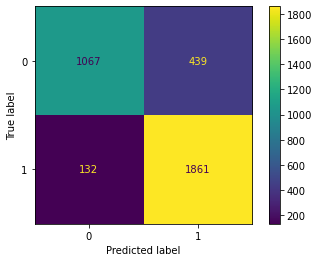

In [99]:
cm_tfidf = confusion_matrix(y_Test, f_reg_test_tfidf_predicted)
cmd_tfidf = ConfusionMatrixDisplay(cm_tfidf, display_labels=['0', '1'])
cmd_tfidf.plot()

Random Forest train dataset

In [100]:
from sklearn.ensemble import RandomForestClassifier

train_cv_tfidf = tfidf.fit_transform(X_Train.apply(lambda x: np.str_(x)))
train_rf_tfidf = selector_tfidf.fit_transform(train_cv_tfidf, y_Train)

In [101]:
random_forest = RandomForestClassifier(n_estimators = 100, max_depth = 7).fit(train_rf_tfidf, y_Train)

In [102]:
y_train_rf = random_forest.predict(train_rf_tfidf)
y_train_rf

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

Matrices for Random Forest Model Training dataset

In [103]:
score_rf_train_tfidf = metrics.accuracy_score(y_Train, y_train_rf)
print("Accuracy:  " +str(score_rf_train_tfidf*100))
print(metrics.classification_report(y_Train, y_train_rf, target_names = ['0', '1']))

Accuracy:  66.659521257592
              precision    recall  f1-score   support

           0       0.99      0.23      0.37      6020
           1       0.63      1.00      0.77      7975

    accuracy                           0.67     13995
   macro avg       0.81      0.61      0.57     13995
weighted avg       0.79      0.67      0.60     13995



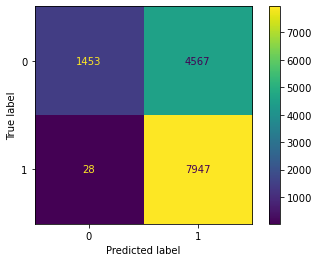

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_tfidf = confusion_matrix(y_Train, y_train_rf)
cmd_tfidf = ConfusionMatrixDisplay(cm_tfidf, display_labels=['0', '1'])
cmd_tfidf.plot()

Random Forest Test dataset

In [108]:
test_cv_tfid_rf = tfidf.transform(X_Test.apply(lambda x: np.str_(x)))
test_rf_tfidf = selector_tfidf.transform(test_cv_tfid_rf)

In [109]:
y_test_rf = random_forest.predict(test_rf_tfidf)
y_test_rf

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [110]:
score_rf_test_tfidf = metrics.accuracy_score(y_Test, y_test_rf)
print("Accuracy:  " +str(score_rf_test_tfidf*100))
print(metrics.classification_report(y_Test, y_test_rf, target_names = ['0', '1']))

Accuracy:  64.47556444698486
              precision    recall  f1-score   support

           0       0.94      0.19      0.31      1506
           1       0.62      0.99      0.76      1993

    accuracy                           0.64      3499
   macro avg       0.78      0.59      0.54      3499
weighted avg       0.75      0.64      0.57      3499



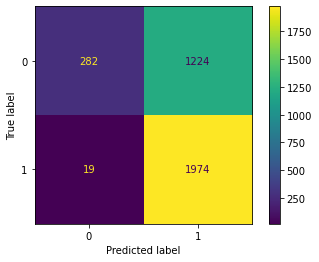

In [112]:
cm_tfidf_rf = confusion_matrix(y_Test, y_test_rf)
cmd_tfidf = ConfusionMatrixDisplay(cm_tfidf_rf, display_labels=['0', '1'])
cmd_tfidf.plot()

Random Forest with Countvectorizer for test data

In [114]:
train_cv_rf = vectorizer.fit_transform(X_Train.apply(lambda x: np.str_(x)))
train_cv_rf_transform = selector.fit_transform(train_cv_rf, y_Train)
random_forest_cv = RandomForestClassifier(n_estimators = 100, max_depth = 7).fit(train_cv_rf_transform, y_Train)
y_train_rf_cv_predicted = random_forest_cv.predict(train_cv_rf_transform)

In [115]:
score_rf_train_cv = metrics.accuracy_score(y_Train, y_train_rf_cv_predicted)
print("Accuracy:  " +str(score_rf_train_cv*100))
print(metrics.classification_report(y_Train, y_train_rf_cv_predicted, target_names = ['0', '1']))

Accuracy:  66.63093962129332
              precision    recall  f1-score   support

           0       0.98      0.23      0.37      6020
           1       0.63      1.00      0.77      7975

    accuracy                           0.67     13995
   macro avg       0.81      0.61      0.57     13995
weighted avg       0.78      0.67      0.60     13995



In [116]:
test_cv_rf = vectorizer.transform(X_Test.apply(lambda x: np.str_(x)))
test_cv_rf_transform = selector_tfidf.transform(test_cv_tfid_rf)
y_test_cv_rf_predicted = random_forest_cv.predict(test_cv_rf_transform)

In [117]:
score_cv_rf_test = metrics.accuracy_score(y_Test, y_test_cv_rf_predicted)
print("Accuracy:  " +str(score_cv_rf_test*100))
print(metrics.classification_report(y_Test, y_test_cv_rf_predicted, target_names = ['0', '1']))

Accuracy:  56.95913118033724
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1506
           1       0.57      1.00      0.73      1993

    accuracy                           0.57      3499
   macro avg       0.28      0.50      0.36      3499
weighted avg       0.32      0.57      0.41      3499



C:\Users\yash0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yash0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


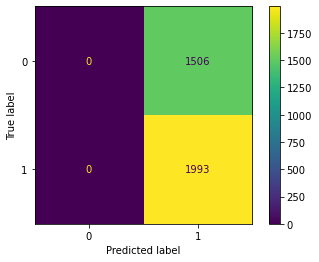

In [118]:
cm_cv_rf_f_reg = confusion_matrix(y_Test, y_test_cv_rf_predicted)
cmd_cm_cv_rf_f_reg = ConfusionMatrixDisplay(cm_cv_rf_f_reg, display_labels=['0', '1'])
cmd_cm_cv_rf_f_reg.plot()

References: <br>
https://practicaldatascience.co.uk/machine-learning/how-to-preprocess-text-for-nlp-in-four-easy-steps <br>
https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm <br>
https://urytrayudu1.medium.com/sentiment-analysis-for-yelp-review-classification-54b65c09ff7b <br>
https://towardsdatascience.com/natural-language-processing-count-vectorization-with-scikit-learn-e7804269bb5e <br>
https://stackoverflow.com/questions/22341271/get-list-from-pandas-dataframe-column-or-rowS <br>
https://practicaldatascience.co.uk/machine-learning/how-to-preprocess-text-for-nlp-in-four-easy-steps <br>
https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/ <br>
Prof Catherine Blake Lecture Slides <br>
